# Disease prediction through symptoms

In [2]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


```Here, the symptoms count are varying for the diseases. For making the data workable, we have to convert the string values to numeric labels for each unique symptom.```

In [24]:
symptoms = set()
for s in df.columns[1:]:
    symptoms.update(df[s].unique())

symptoms_list = list(symptoms) 
symptoms_list
    

[nan,
 ' history_of_alcohol_consumption',
 ' pus_filled_pimples',
 ' obesity',
 ' drying_and_tingling_lips',
 ' skin_peeling',
 ' small_dents_in_nails',
 ' watering_from_eyes',
 ' neck_pain',
 ' receiving_blood_transfusion',
 ' red_spots_over_body',
 'itching',
 ' high_fever',
 ' receiving_unsterile_injections',
 ' indigestion',
 ' yellow_urine',
 ' joint_pain',
 ' foul_smell_of urine',
 ' puffy_face_and_eyes',
 ' anxiety',
 ' fast_heart_rate',
 ' blurred_and_distorted_vision',
 ' skin_rash',
 ' dizziness',
 ' muscle_wasting',
 ' vomiting',
 ' rusty_sputum',
 ' irregular_sugar_level',
 ' patches_in_throat',
 ' knee_pain',
 ' pain_during_bowel_movements',
 ' sunken_eyes',
 ' lethargy',
 ' blister',
 ' distention_of_abdomen',
 ' weakness_in_limbs',
 ' acute_liver_failure',
 ' mood_swings',
 ' excessive_hunger',
 ' restlessness',
 ' irritation_in_anus',
 ' swollen_blood_vessels',
 ' polyuria',
 ' visual_disturbances',
 ' acidity',
 ' spotting_ urination',
 ' loss_of_balance',
 ' mild_feve

In [25]:
symptoms_list.remove(np.NAN)

In [26]:
df.groupby(df.columns[0]).count().head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
Unnamed: 0,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,120,120,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0
AIDS,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0,0,0
Acne,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,120,120,120,120,120,120,78,0,0,0,0,0,0,0,0,0,0
Allergy,120,120,120,72,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
processed_df = pd.DataFrame(columns=[*symptoms_list,'disease'])
processed_df

,history_of_alcohol_consumption,pus_filled_pimples,obesity,drying_and_tingling_lips,skin_peeling,small_dents_in_nails,watering_from_eyes,neck_pain,receiving_blood_transfusion,red_spots_over_body,...,breathlessness,abnormal_menstruation,dark_urine,mucoid_sputum,dehydration,passage_of_gases,irritability,cramps,stiff_neck,disease


In [28]:
processed_df = pd.DataFrame(columns=[*symptoms_list,'disease'])
for i in range(len(df)):
    processed_df.loc[i] = [*[1 if s in df.iloc[i].values else 0 for s in symptoms_list],df.iloc[i][0]]

In [29]:
processed_df.head()

,history_of_alcohol_consumption,pus_filled_pimples,obesity,drying_and_tingling_lips,skin_peeling,small_dents_in_nails,watering_from_eyes,neck_pain,receiving_blood_transfusion,red_spots_over_body,...,breathlessness,abnormal_menstruation,dark_urine,mucoid_sputum,dehydration,passage_of_gases,irritability,cramps,stiff_neck,disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


<AxesSubplot:>

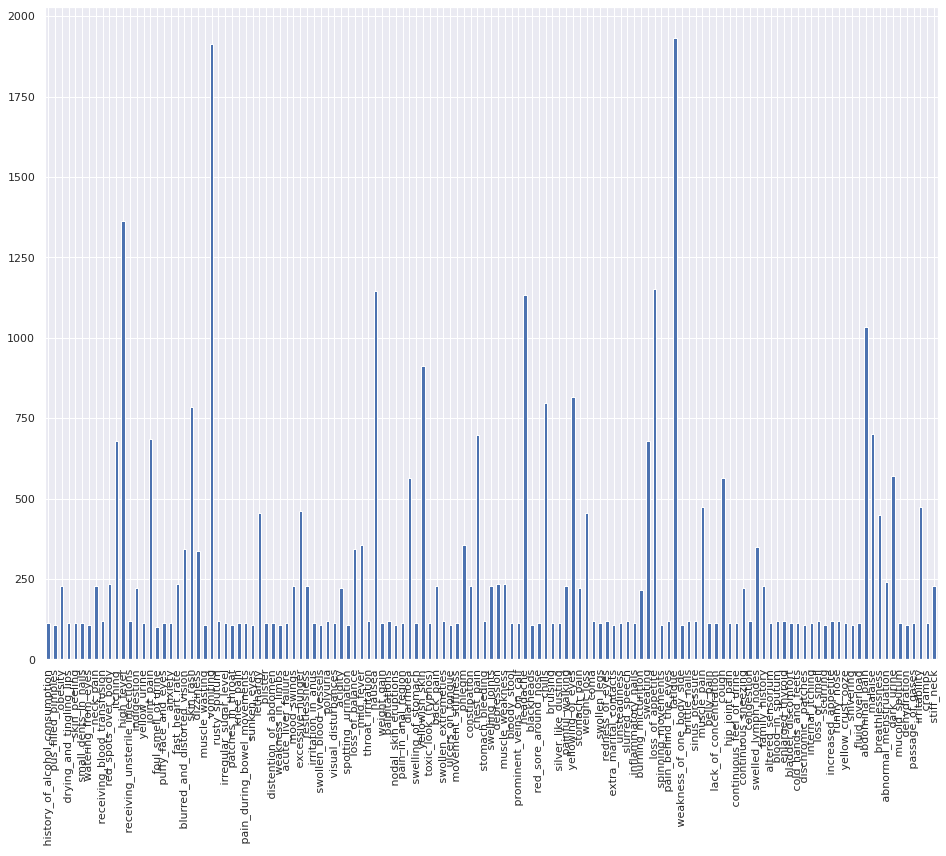

In [74]:
symptoms_count = processed_df.iloc[:,:-1].sum(axis=0)
symptoms_count.plot(kind="bar", figsize=(16,12))

In [88]:
common_symptoms_count = symptoms_count.describe()["25%"]
most_common_symptoms = symptoms_count[symptoms_count > common_symptoms_count]

In [90]:
print(f"There are about {len(most_common_symptoms)} symptoms that are common in the disease")
print(f"The most common symptoms are: {most_common_symptoms.index}")

There are about 71 symptoms that are common in the disease
The most common symptoms are: Index([' obesity', ' neck_pain', ' receiving_blood_transfusion',
       ' red_spots_over_body', 'itching', ' high_fever',
       ' receiving_unsterile_injections', ' indigestion', ' joint_pain',
       ' fast_heart_rate', ' blurred_and_distorted_vision', ' skin_rash',
       ' dizziness', ' vomiting', ' rusty_sputum', ' lethargy', ' mood_swings',
       ' excessive_hunger', ' restlessness', ' polyuria', ' acidity',
       ' loss_of_balance', ' mild_fever', ' throat_irritation', ' nausea',
       ' palpitations', ' diarrhoea', ' yellowish_skin', ' back_pain',
       ' swollen_extremeties', ' phlegm', ' constipation', ' chest_pain',
       ' stomach_bleeding', ' swelling_joints', ' depression',
       ' muscle_weakness', ' headache', ' chills', ' painful_walking',
       ' yellowing_of_eyes', ' stomach_pain', ' weight_loss', ' coma',
       ' redness_of_eyes', ' slurred_speech', ' burning_micturition

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

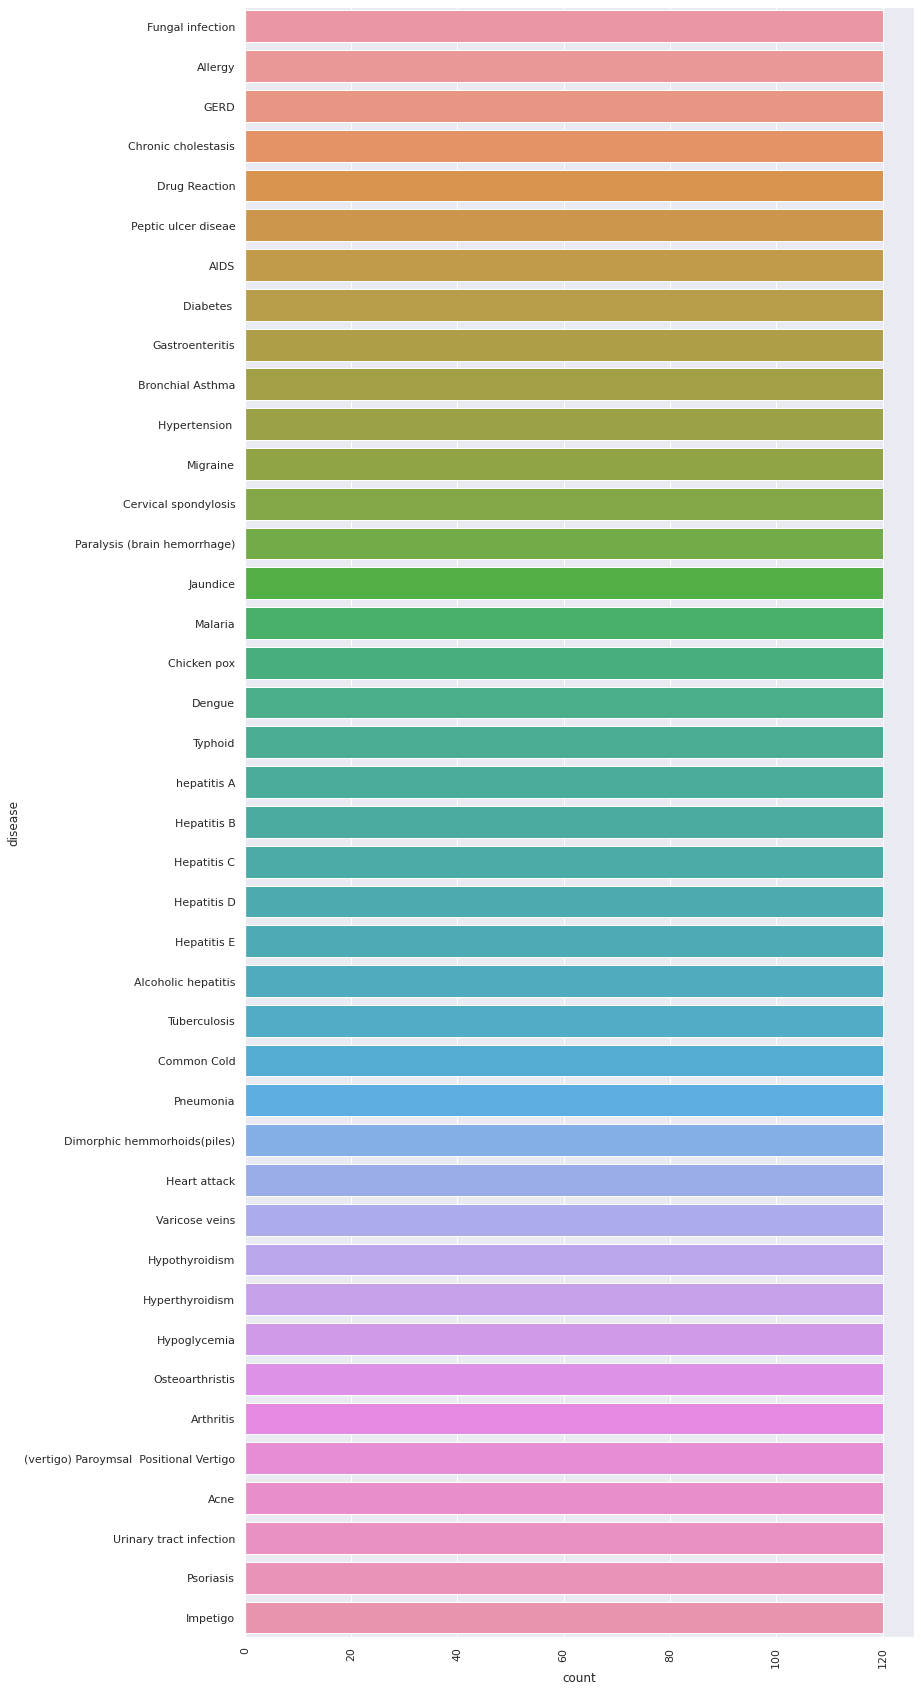

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="disease", data=processed_df)
print(processed_df["disease"].value_counts())

```Spliting the dataset in train and test set in the ratio of 2:1```

In [30]:
from sklearn.model_selection import train_test_split
X=processed_df.drop(["disease"],axis=1)
y=processed_df["disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0,stratify=y)

In [31]:
train_df= X_train
train_df["disease"]=y_train
test_df=X_test
test_df["disease"]=y_test
# X_train.loc[:,processed_df.columns[:-1]] = processed_df.loc[:,processed_df.columns[:-1]].astype('int8')


In [32]:
assert (train_df.shape[1]==test_df.shape[1])

In [33]:
train_df["disease"].unique()
len(train_df["disease"].unique())

41

Heart attack                               81
Jaundice                                   81
Tuberculosis                               81
Osteoarthristis                            81
Dengue                                     81
Migraine                                   81
Malaria                                    81
Common Cold                                81
Urinary tract infection                    81
Hepatitis C                                81
Psoriasis                                  81
Allergy                                    81
Hypoglycemia                               81
Impetigo                                   81
hepatitis A                                81
Acne                                       81
Peptic ulcer diseae                        80
Typhoid                                    80
Hyperthyroidism                            80
Dimorphic hemmorhoids(piles)               80
(vertigo) Paroymsal  Positional Vertigo    80
Hypertension                      

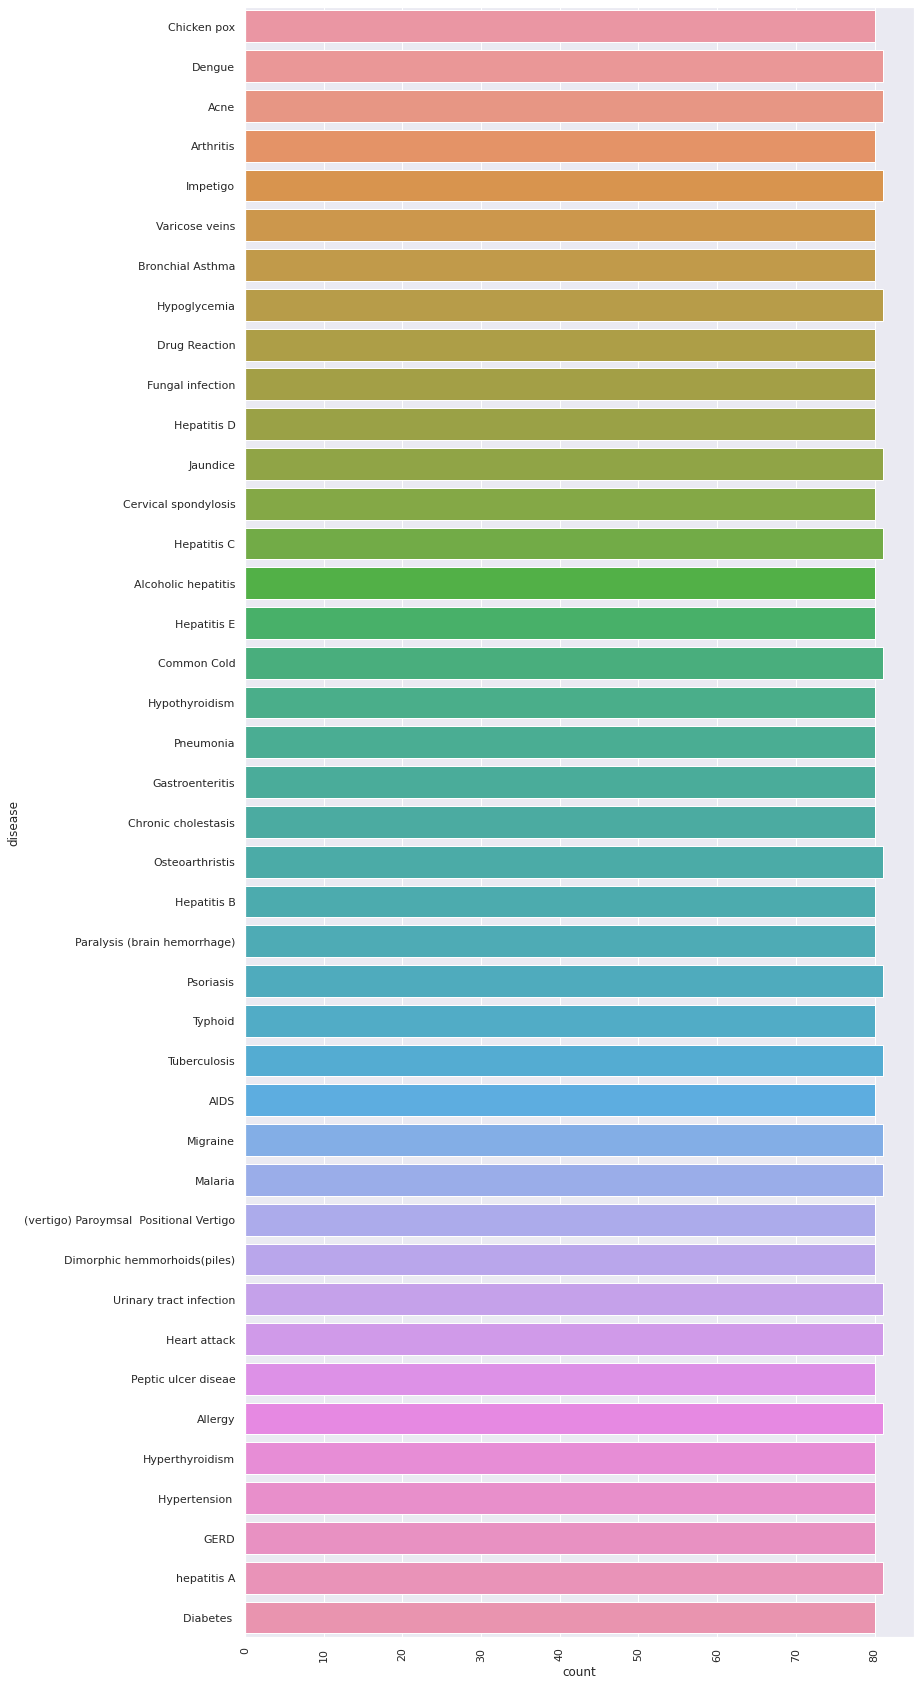

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="disease", data=train_df)
print(train_df["disease"].value_counts())


In [56]:
train_df.head()

,itching,high_fever,yellow_urine,joint_pain,skin_rash,vomiting,rusty_sputum,lethargy,weakness_in_limbs,excessive_hunger,...,malaise,breathlessness,dark_urine,mucoid_sputum,dehydration,passage_of_gases,irritability,cramps,stiff_neck,disease
0,1,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,Chicken pox
1,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dengue
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acne
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Impetigo


In [58]:
train_df["itching"].value_counts()

0    2844
1     452
Name: itching, dtype: int64

**The data seems to have balanced entries**

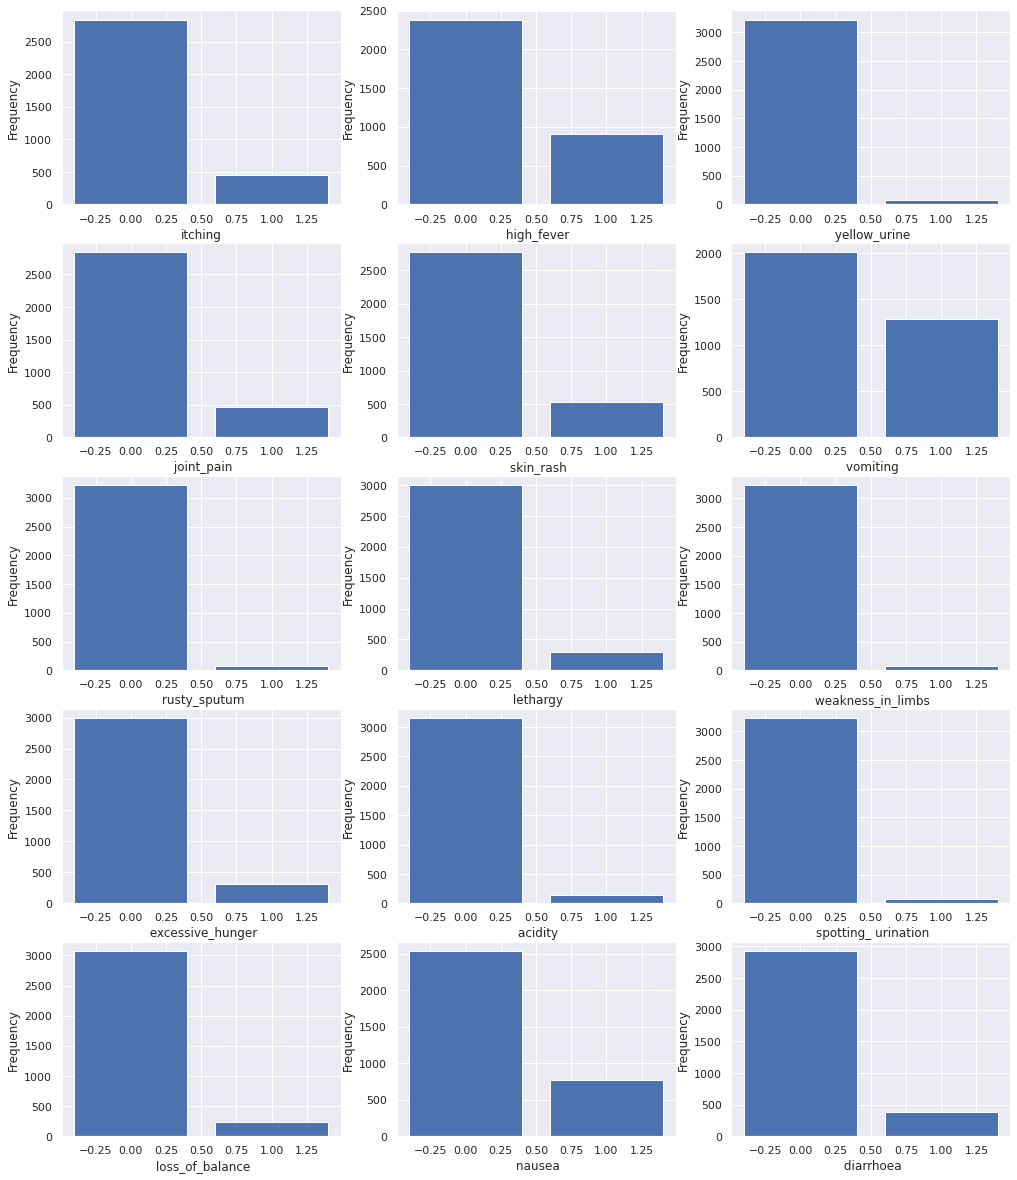

In [63]:
# lets visualize some of features
features = train_df.columns[:15]

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(len(features)//3+1,3,i+1)
    val_cnt = train_df[feature].value_counts()
    plt.bar(val_cnt.index.to_numpy(), val_cnt.values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

In [36]:
# train_df.drop(["index"], axis=1, inplace=True)
train_df.reset_index(drop=True, inplace=True)
df_corr = train_df.corr().abs()
df_corr

,history_of_alcohol_consumption,pus_filled_pimples,obesity,drying_and_tingling_lips,skin_peeling,small_dents_in_nails,watering_from_eyes,neck_pain,receiving_blood_transfusion,red_spots_over_body,...,malaise,breathlessness,abnormal_menstruation,dark_urine,mucoid_sputum,dehydration,passage_of_gases,irritability,cramps,stiff_neck
history_of_alcohol_consumption,1.000000,0.023276,0.034124,0.023761,0.023920,0.023920,0.022948,0.034124,0.024393,0.034473,...,0.063074,0.048941,0.034935,0.056081,0.023761,0.023439,0.023761,0.050452,0.023761,0.034007
pus_filled_pimples,0.023276,1.000000,0.033205,0.023121,0.023276,0.023276,0.022330,0.033205,0.023737,0.033545,...,0.061375,0.047623,0.033994,0.054571,0.023121,0.022808,0.023121,0.049094,0.023121,0.033091
obesity,0.034124,0.033205,1.000000,0.033896,0.034124,0.034124,0.032737,0.048680,0.034798,0.049178,...,0.089978,0.069817,0.049836,0.080002,0.033896,0.033437,0.033896,0.071973,0.677098,0.048513
drying_and_tingling_lips,0.023761,0.023121,0.033896,1.000000,0.023761,0.023761,0.022795,0.033896,0.024231,0.034243,...,0.062653,0.048615,0.034702,0.055707,0.023602,0.023283,0.023602,0.470960,0.023602,0.033780
skin_peeling,0.023920,0.023276,0.034124,0.023761,1.000000,0.946809,0.022948,0.034124,0.024393,0.034473,...,0.063074,0.048941,0.034935,0.056081,0.023761,0.023439,0.023761,0.050452,0.023761,0.034007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dehydration,0.023439,0.022808,0.033437,0.023283,0.023439,0.023439,0.022486,0.033437,0.023902,0.033779,...,0.061804,0.047956,0.034231,0.054952,0.023283,1.000000,0.023283,0.049436,0.023283,0.033322
passage_of_gases,0.023761,0.023121,0.033896,0.023602,0.023761,0.023761,0.022795,0.033896,0.024231,0.034243,...,0.062653,0.048615,0.034702,0.055707,0.023602,0.023283,1.000000,0.050116,0.023602,0.033780
irritability,0.050452,0.049094,0.071973,0.470960,0.050452,0.050452,0.048401,0.071973,0.051450,0.072710,...,0.133032,0.103225,0.692433,0.118283,0.050116,0.049436,0.050116,1.000000,0.050116,0.271719
cramps,0.023761,0.023121,0.677098,0.023602,0.023761,0.023761,0.022795,0.033896,0.024231,0.034243,...,0.062653,0.048615,0.034702,0.055707,0.023602,0.023283,0.023602,0.050116,1.000000,0.033780


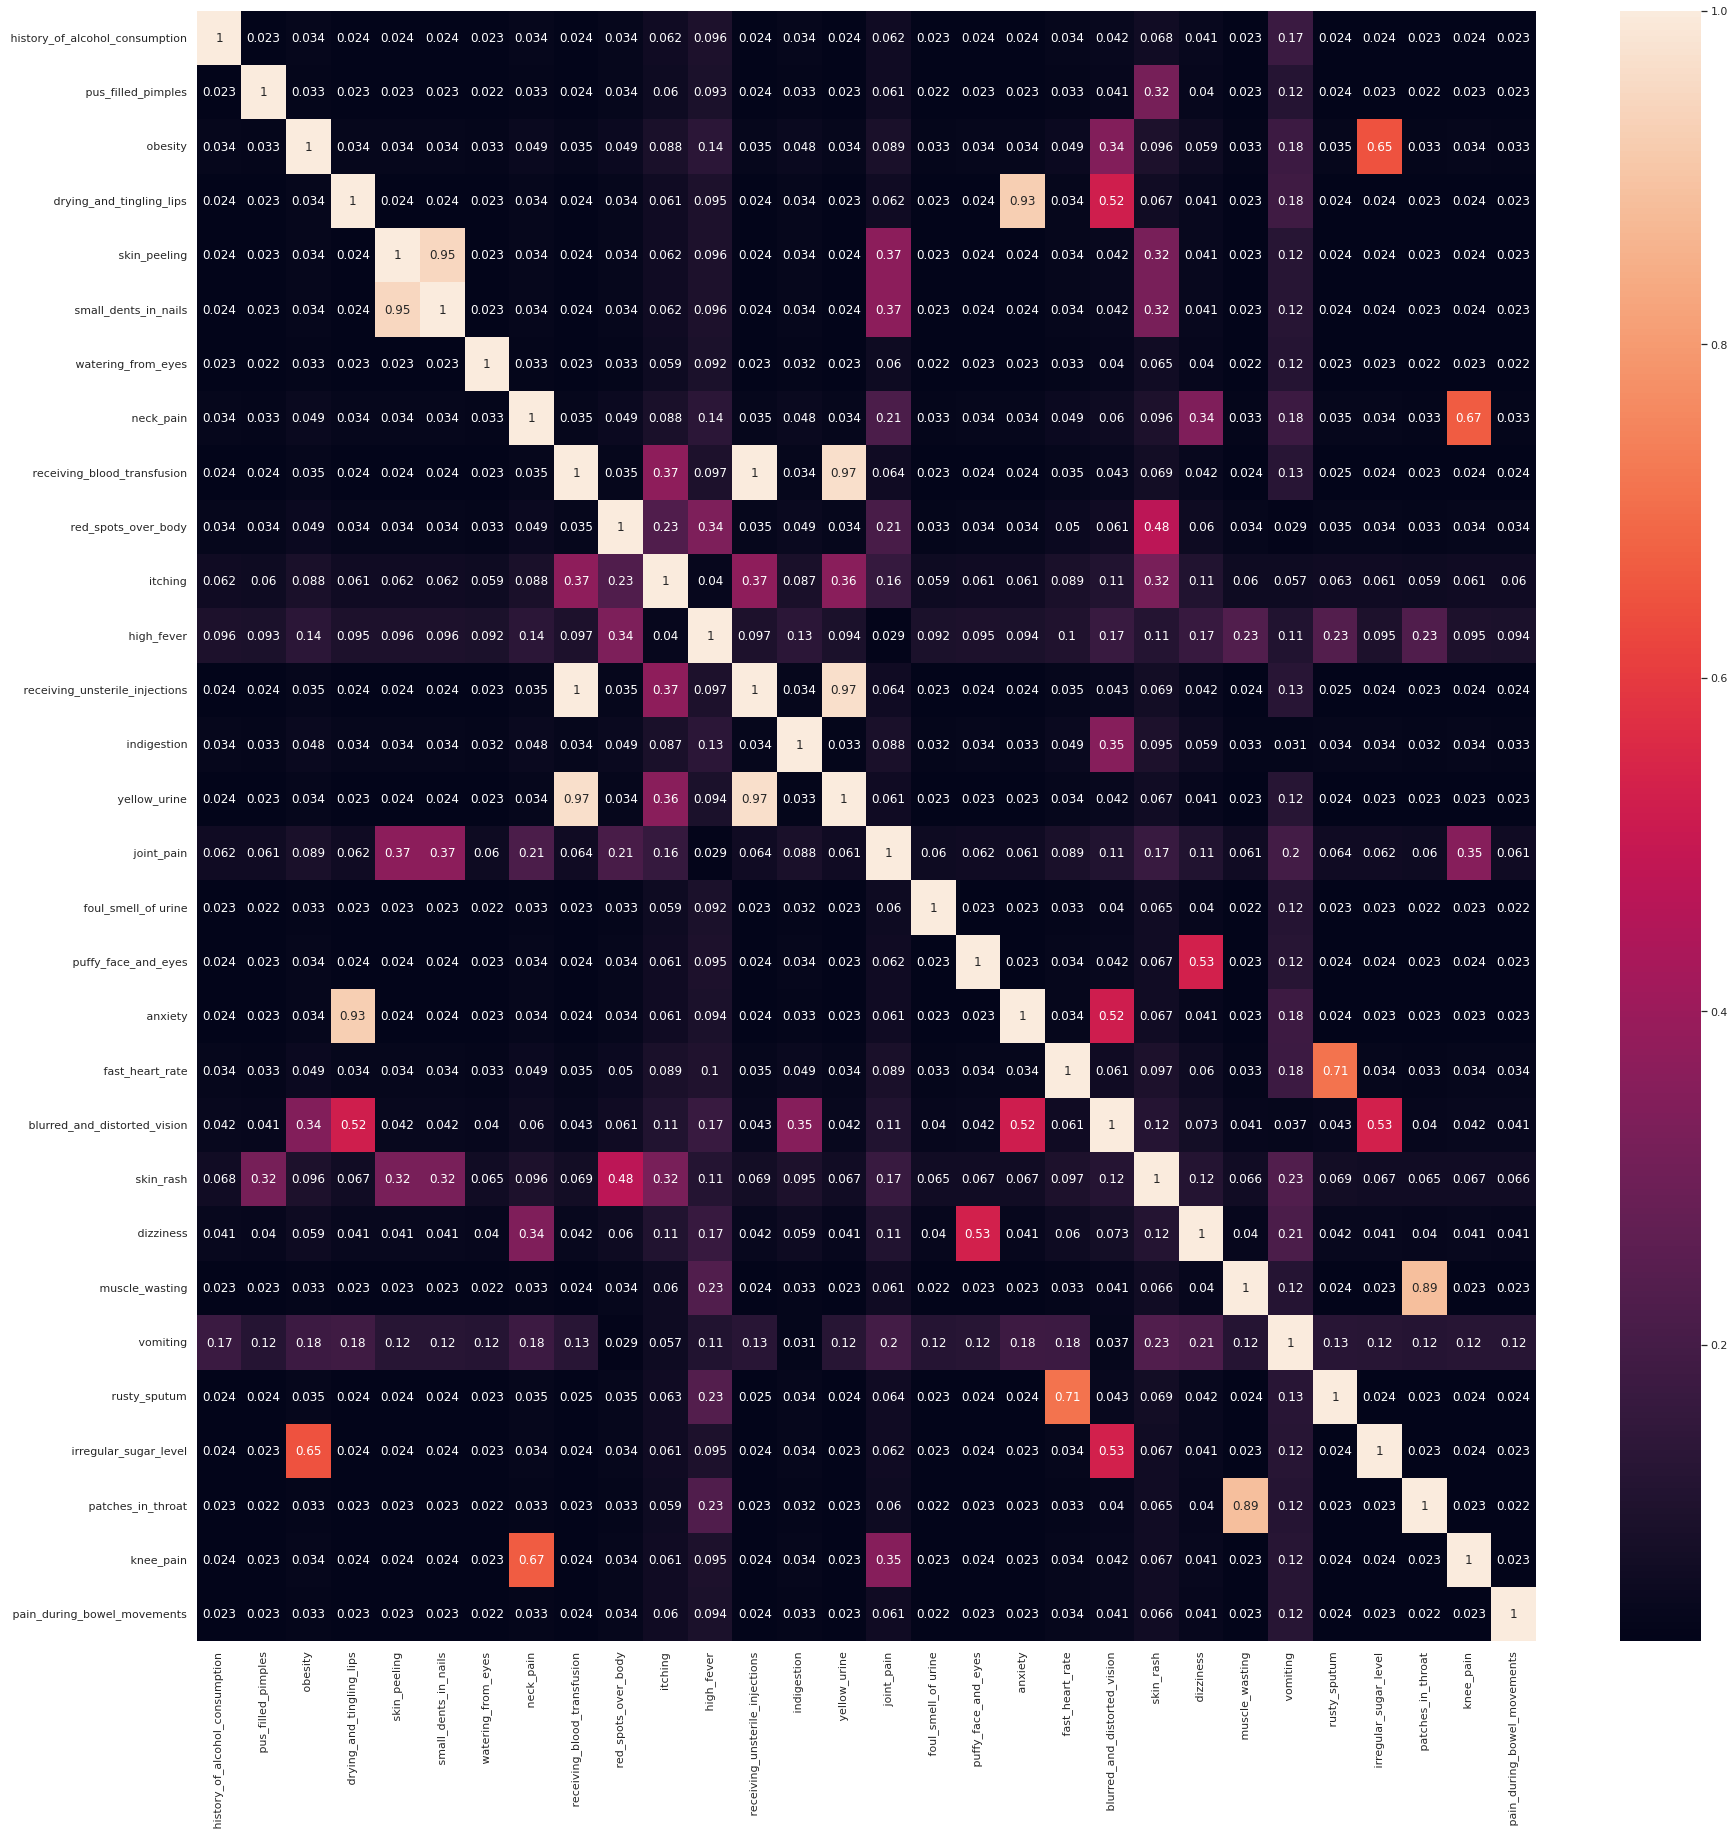

In [38]:

plt.figure(figsize = (30, 30))
sns.heatmap(abs(df_corr.iloc[:30, :30]), annot = True)
plt.show()

<AxesSubplot:>

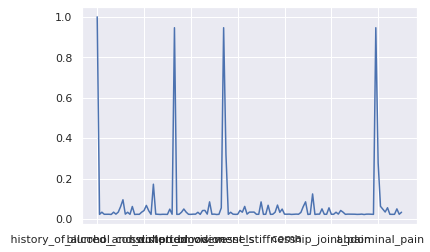

In [39]:
df_corr.iloc[0].plot()

In [40]:
corr_mat =df_corr.corr()
drop_columns=[]
for i,column in enumerate(corr_mat.columns):
  if any(corr_mat[column].iloc[i+1:]>0.75 ):
    drop_columns.append(column)

print(f"The count of extra highly correlated columns : {len(drop_columns)}")


# high_corr={}
# indices = np.array(range(len(corr_mat)))
# for i,column in enumerate(corr_mat.columns):
#     high_corr[column] = indices[corr_mat[column]>0.75]
    

# high_corr
# corr_matrix



The count of extra highly correlated columns : 78


In [41]:
train_df.drop(drop_columns,axis=1,inplace=True)
test_df.drop(drop_columns,axis=1,inplace=True)

```Creating a classifier without preprocessing the dataset```

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
clf.get_depth()

58

In [37]:
clf.get_n_leaves()

72

In [31]:
clf.feature_importances_

array([0.        , 0.02518465, 0.        , 0.02518965, 0.01453812,
       0.        , 0.00121946, 0.        , 0.        , 0.        ,
       0.        , 0.02421094, 0.00088112, 0.        , 0.00130613,
       0.        , 0.0229126 , 0.02533453, 0.        , 0.02217687,
       0.        , 0.        , 0.00182093, 0.        , 0.02388709,
       0.        , 0.        , 0.02399521, 0.0257968 , 0.        ,
       0.01840378, 0.00151295, 0.        , 0.02488162, 0.        ,
       0.        , 0.00212586, 0.02163394, 0.00150402, 0.0434813 ,
       0.        , 0.        , 0.        , 0.02518438, 0.02488408,
       0.02345083, 0.        , 0.        , 0.        , 0.02488225,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00082929, 0.02487866, 0.        , 0.02347659, 0.        ,
       0.        , 0.        , 0.00179593, 0.        , 0.        ,
       0.02518409, 0.00181287, 0.        , 0.00241461, 0.0012061 ,
       0.00062197, 0.        , 0.00259893, 0.02244802, 0.00210

```Creating a classifier using preprocessed data```

In [42]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(train_df.loc[:,train_df.columns[:-1]],train_df.loc[:,'disease'])

DecisionTreeClassifier(random_state=0)

In [43]:
importance_column_index = (classifier.feature_importances_==0)

In [44]:
classifier.get_depth()

45

In [49]:
classifier.feature_importances_

array([0.00844652, 0.04735446, 0.        , 0.00336045, 0.00431544,
       0.00490123, 0.02490785, 0.        , 0.00098731, 0.        ,
       0.0022507 , 0.02212134, 0.02330772, 0.04440051, 0.02311678,
       0.04862838, 0.02354147, 0.03068432, 0.02639252, 0.01750049,
       0.0242347 , 0.02490837, 0.00096268, 0.02521153, 0.02389294,
       0.00237159, 0.00543762, 0.00266934, 0.02521098, 0.02403068,
       0.02520446, 0.        , 0.02392515, 0.02348143, 0.02301352,
       0.02521177, 0.02423085, 0.02193969, 0.00988474, 0.02490858,
       0.02521126, 0.02423813, 0.02251937, 0.02307225, 0.02491097,
       0.02136426, 0.04674607, 0.02095626, 0.00150941, 0.02355516,
       0.02445026, 0.0235666 , 0.00095191])

In [45]:
print(f" Number of columns in train and test set : {len(train_df.columns)} & {len(test_df.columns)}")

 Number of columns in train and test set : 54 & 54


In [47]:
pred_y = classifier.predict(test_df.loc[:,test_df.columns[:-1]])
sum(pred_y==test_df["disease"])*100/len(pred_y)

99.8152709359606

In [48]:
from sklearn.metrics import classification_report

print(classification_report(test_df["disease"], pred_y, target_names=test_df["disease"].unique()))


                                         precision    recall  f1-score   support

                            Hepatitis D       1.00      1.00      1.00        40
                Urinary tract infection       1.00      1.00      1.00        40
                          Drug Reaction       1.00      1.00      1.00        39
                               Migraine       1.00      1.00      1.00        40
                            hepatitis A       1.00      1.00      1.00        39
(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        40
                         Varicose veins       1.00      1.00      1.00        40
                        Gastroenteritis       1.00      1.00      1.00        40
                         Hypothyroidism       1.00      1.00      1.00        40
                                   Acne       1.00      1.00      1.00        40
                       Fungal infection       1.00      1.00      1.00        39
                    Peptic 

In [35]:
pred_y = clf.predict(X_test)
sum(pred_y==y_test)*100/len(y_test)

100.0

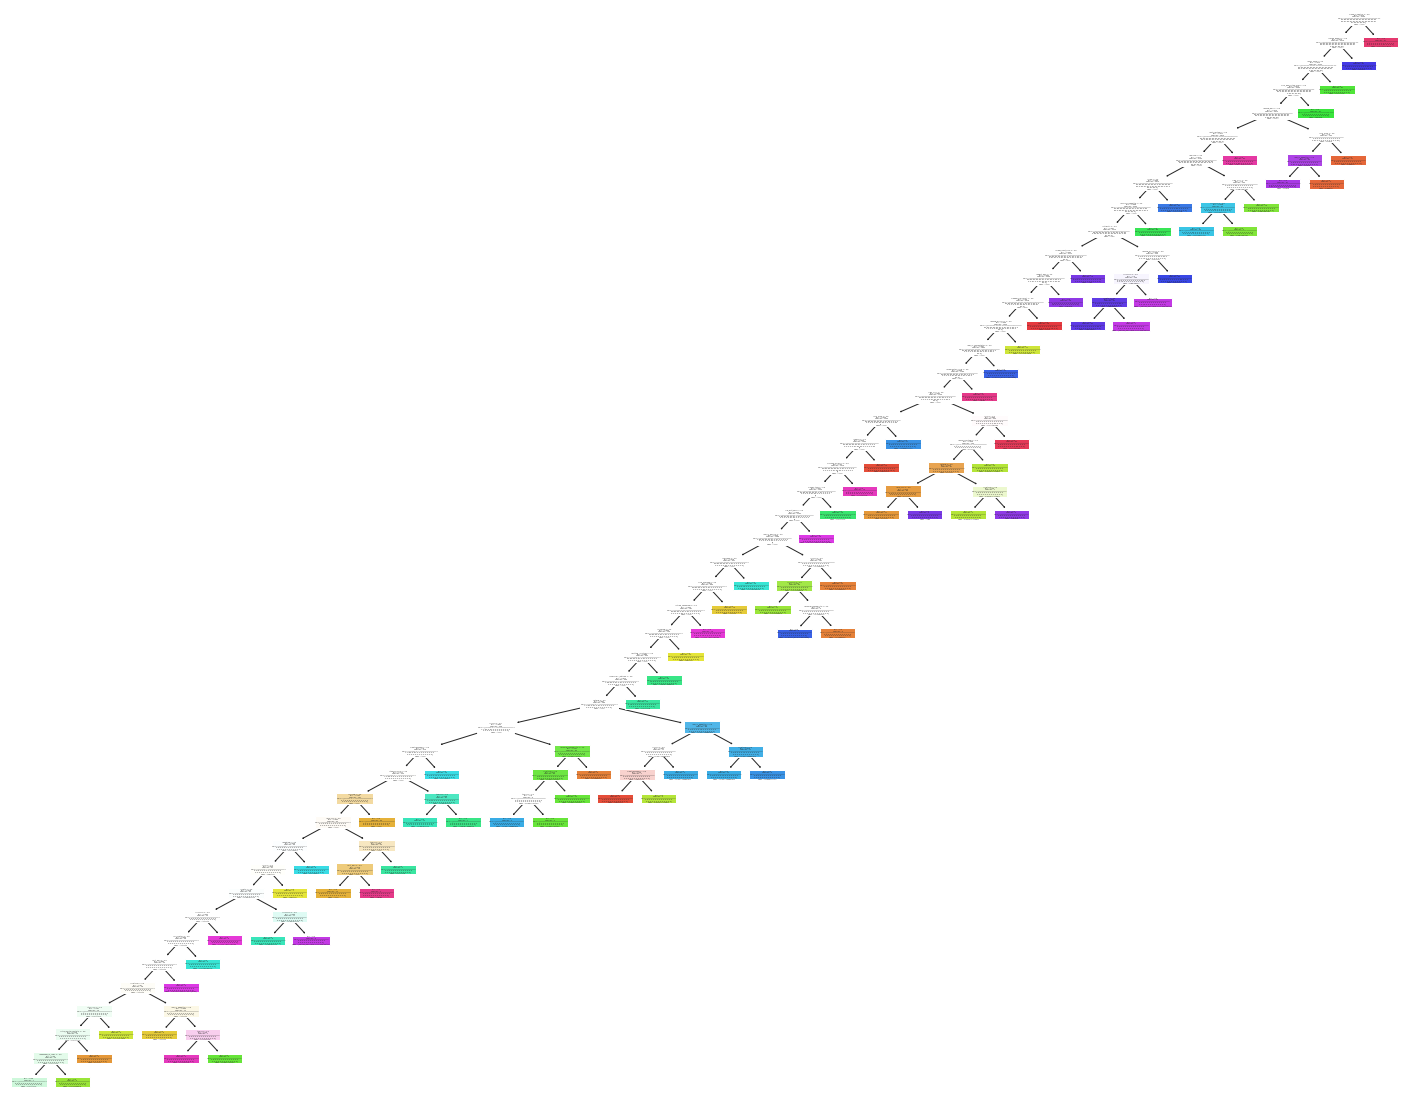

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=X_train.columns,  
                   class_names=y_train.unique(),
                   filled=True)